In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('science')

<ErrorbarContainer object of 3 artists>

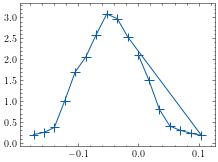

In [23]:
data=np.loadtxt('2meros.txt')
x = data[:,0]
y = data[:,1]
x = np.pi*x/180
x = np.sin(x)
x_error=x*0+0.008
y_error=y*0+0.1
plt.errorbar(x, y, y_error, x_error)

In [24]:
def gauss (x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
def linear (x, a, b):
    return a*x + b

In [25]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(gauss, x, y, p0=(1,0.6, 5))
print(popt)
print(np.sqrt(np.diag(pcov)))

[ 3.01719633 -0.04486433 -0.05101602]
[0.05826983 0.00113625 0.00113997]


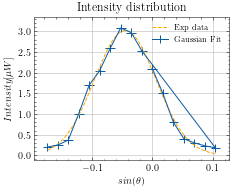

In [26]:
plt.errorbar(x, y, y_error, x_error)
xaxis=np.linspace(np.min(x), np.max(x), 1000)
plt.plot(xaxis, gauss(xaxis, *popt), '--', color='orange')
plt.grid()
plt.legend(['Exp data', 'Gaussian Fit'], loc='upper right', prop={"size":8})
plt.title(r'Intensity distribution')
plt.ylabel(r'$Intensity [\mu W]$')
plt.xlabel(r'$sin(\theta)$')

plt.savefig('intensitydest.png', dpi=500)